In [56]:
import torch
import matplotlib.pyplot as plt
from flip import flip
from plus_transition import plus_transition
from build_tensor import build_tensor
from split import split
from generate import generate
import sys
import os
from tqdm import tqdm

Импортируем функцию reducible, которая считает сколько в тензоре триад, для которых можно сделать reduce

In [57]:
sys.path.append(os.path.abspath("../../flipgraph"))

In [58]:
from reduce import reducible

Задаем параметры подсчета

In [59]:
n1, n2, n3 = 5, 5, 5 # we have multiply n1×n2 * n2×n3 = n1×n3
N = 2000 # count of triads in big tensor
r = 15 # initial rang
VUW = generate((n1, n2, n3), N, r) # tensor
final_r = 80 # final rang

In [60]:
x = []
y = []

Начинаем подсчет

In [61]:
for k in tqdm(range(final_r - r)):
    used_count = 0
    reduce_count = 0
    # wait for the vertices to thermalize to ensure randomness during the walk
    for _ in range(10000):
        VUW = flip(VUW)
    # start counting
    for _ in range(100):
        used_count += N
        reduce_mask = reducible(VUW)
        reduce_count += reduce_mask.sum()
        VUW = flip(VUW)
    x.append(r + k)
    y.append(reduce_count / used_count)
    VUW = split(VUW, (n1, n2, n3))

100%|████████████████████████████████████████████████████████████████████████████████████████| 65/65 [44:43<00:00, 41.29s/it]


Выводим результат

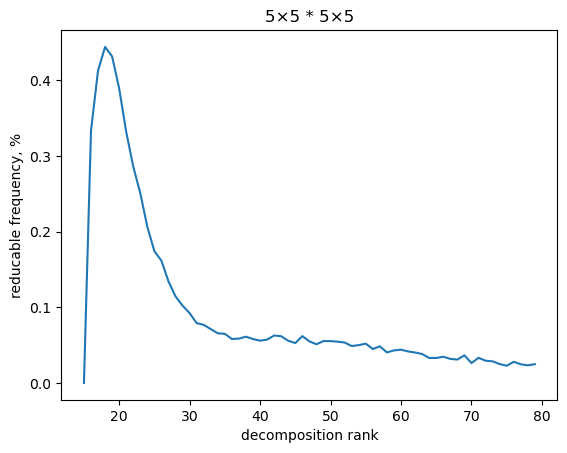

<Figure size 640x480 with 0 Axes>

In [62]:
plt.clf()
plt.plot(x, y)
plt.xlabel('decomposition rank')
plt.ylabel('reducable frequency, %')
plt.title('5×5 * 5×5')
plt.show()
plt.savefig("mult_5_5_5.png")

Теперь для 3×3 * 3×3

In [69]:
n1, n2, n3 = 3, 3, 3 # we have multiply n1×n2 * n2×n3 = n1×n3
N = 2000 # count of triads in big tensor
r = 15 # initial rang
VUW = generate((n1, n2, n3), N, r) # tensor
final_r = 70 # final rang

In [70]:
x = []
y = []

for k in tqdm(range(final_r - r)):
    used_count = 0
    reduce_count = 0
    # wait for the vertices to thermalize to ensure randomness during the walk
    for _ in range(10000):
        VUW = flip(VUW)
    # start counting
    for _ in range(100):
        used_count += N
        reduce_mask = reducible(VUW)
        reduce_count += reduce_mask.sum()
        VUW = flip(VUW)
    x.append(r + k)
    y.append(reduce_count / used_count)
    VUW = split(VUW, (n1, n2, n3))

100%|████████████████████████████████████████████████████████████████████████████████████████| 55/55 [29:52<00:00, 32.60s/it]


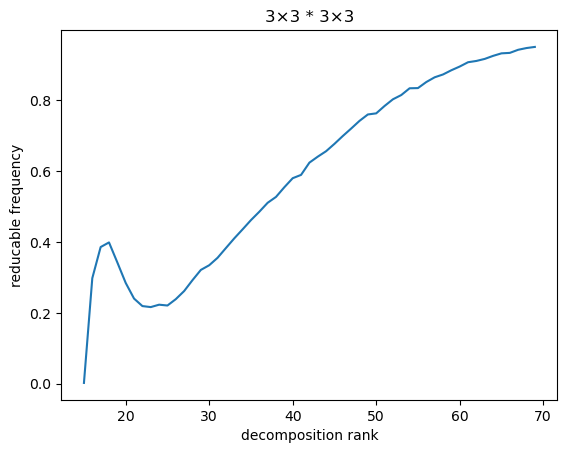

<Figure size 640x480 with 0 Axes>

In [71]:
plt.clf()
plt.plot(x, y)
plt.xlabel('decomposition rank')
plt.ylabel('reducable frequency')
plt.title('3×3 * 3×3')
plt.show()
plt.savefig("mult_3_3_3.png")